<a href="https://colab.research.google.com/github/niltontac/EspAnalise-EngDados/blob/master/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About this DataFrame**

## Forest fires are a serious problem for the preservation of the Tropical Forests. Understanding the frequency of forest fires in a time series can help to take action to prevent them. Brazil has the largest rainforest on the planet that is the Amazon rainforest.

Os incêndios florestais são um problema sério para a preservação das florestas tropicais. Compreender a frequência dos incêndios florestais em uma série temporal pode ajudar a tomar medidas para evitá-los. O Brasil possui a maior floresta tropical do planeta que é a floresta amazônica.

## DataFrame report of the number of forest fires in Brazil divided by states. The series comprises the period of approximately 20 years (1998 to 2017). The data were obtained from the official website of the Brazilian government.

Relatório de um conjunto de dados do número de incêndios florestais no Brasil dividido por estados. A série compreende o período de aproximadamente 10 anos (1998 a 2017). Os dados foram obtidos no site oficial do governo brasileiro.

# Analyst: Nilton Thiago de Andrade Coura

### Análise e Engenharia de Dados - Cesar School/CInUFPE

In [0]:
## Importing packages
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [0]:
## Loading DataFrame(dataset) from file amazon.csv
# Carregando conjunto de dados do arquivo 
dataset=pd.read_csv("https://raw.githubusercontent.com/niltontac/EspAnalise-EngDados/master/amazon.csv",encoding = "ISO-8859-1")

In [25]:
## The index (row labels) and range of the DataFrame.
## Data type of each column
# Índice de entradas (6454) e colunas (5)
# Tipo de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [26]:
## Shape of a DataFrame's distribution
# Resumo da forma de distribuição do conjunto dos dados carregados
# onde temos 6454 registros para observação dos anos e do número de casos de 
# incêndio, a média, o desvio padrão, mínimo e máximo, e os quantis.
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6454.0,2007.461729,5.746654,1998.0,2002.0,2007.0,2012.0,2017.0
number,6454.0,108.293163,190.812242,0.0,3.0,24.0,113.0,998.0


In [27]:
## Viewing the first lines
# Visualizando as primeiras linhas 
dataset.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [28]:
## Viewing the last lines
# Visualizando as últimas linhas
dataset.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [29]:
## Viewing DataFrame age range
# Visualizando o intervalo dos anos
dataset.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [30]:
## Viewing DataFrame states
# Visualizando os estados
dataset.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [31]:
## Viewing DataFrame month
# Visualizando os meses
dataset.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

### Analizando o DataFrame

######Após visualizarmos acima algumas informações do DataFrame, vamos agora de fato explorar os dados, realizando as análises e tratamentos necessários desses dados.

In [32]:
 # A coluna "date" do DataFrame não será necessária, pois já existem as colunas 
 # "year" e "month" que fornecem informações em relação a períodos. 
 # Logo, a coluna "date" será excluída. 
dataset.drop('date', axis=1, inplace=True)
dataset.head()

,year,state,month,number
0,1998,Acre,Janeiro,0.0
1,1999,Acre,Janeiro,0.0
2,2000,Acre,Janeiro,0.0
3,2001,Acre,Janeiro,0.0
4,2002,Acre,Janeiro,0.0


In [33]:
# Verificando se há registros nulos no DataFrame para serem tratados 
dataset.isna().sum()

year      0
state     0
month     0
number    0
dtype: int64

Como verificado acima, neste DataFrame não existem dados nulos. Agora, vamos verificar se existem dados duplicados:

In [34]:
dataset[dataset.duplicated(keep=False)]

,year,state,month,number
258,2017,Alagoas,Janeiro,38.0
259,2017,Alagoas,Janeiro,38.0
2391,1998,Mato Grosso,Janeiro,0.0
2411,1998,Mato Grosso,Fevereiro,0.0
2431,1998,Mato Grosso,Março,0.0
2451,1998,Mato Grosso,Abril,0.0
2471,1998,Mato Grosso,Maio,0.0
2630,1998,Mato Grosso,Janeiro,0.0
2650,1998,Mato Grosso,Fevereiro,0.0
2670,1998,Mato Grosso,Março,0.0


Como verificado acima, existem 32 dados duplicados no DataFrame. Excluíndo os registros duplicados e realizando nova verificação:

In [35]:
dataset.drop_duplicates(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 6453
Data columns (total 4 columns):
year      6422 non-null int64
state     6422 non-null object
month     6422 non-null object
number    6422 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 250.9+ KB


Acima observamos pelo índice que após exclusão dos dados duplicados, agora temos 6422 entradas. 




A partir de agora, vamos buscar nesse DataFrame informações que consideramos importantes:

In [36]:
# Descrevendo todos os casos de incêndio registrados
dataset['number'].describe()

count    6422.000000
mean      108.815178
std       191.142482
min         0.000000
25%         3.000000
50%        24.497000
75%       114.000000
max       998.000000
Name: number, dtype: float64

Observamos acima informações sobre os casos de incêndio. O mínimo (min) de zero, siginifica que não houve caso de incêndio. Outro dado que chama atenção é o número máximo de casos (max). Abaixo vamos observar onde e em que época ocorreu:

In [37]:
print('Maior número de casos de incêndios registrados: ',dataset['number'].max())
print('Ano: ',dataset[dataset['number'] ==  dataset['number'].max()]['year'].iloc[0])
print('Mês: ',dataset[dataset['number'] ==  dataset['number'].max()]['month'].iloc[0])
print('Estado: ',dataset[dataset['number'] ==  dataset['number'].max()]['state'].iloc[0])

Maior número de casos de incêndios registrados:  998.0
Ano:  2008
Mês:  Setembro
Estado:  Amazonas


In [38]:
print('Onde não houve caso de incêndio registrado: ',dataset['number'].min())
print('Ano: ',dataset[dataset['number'] ==  dataset['number'].min()]['year'].iloc[0])
print('Mês: ',dataset[dataset['number'] ==  dataset['number'].min()]['month'].iloc[0])
print('Estado: ',dataset[dataset['number'] ==  dataset['number'].min()]['state'].iloc[0])

Onde não houve caso de incêndio registrado:  0.0
Ano:  1998
Mês:  Janeiro
Estado:  Acre


In [39]:
## Sum of fire logs
# Soma de todos os casos de incêndios registrados dentro do intervalo 
# 1998 a 2017
dataset.number.sum()

698811.073

In [110]:
# Mediana dos casos de incêndio por estado
dataset.groupby('state')['number'].median()

state
Acre                  2.188
Alagoas              10.000
Amapa                 2.000
Amazonas             23.000
Bahia               140.000
Ceara                16.000
Distrito Federal      2.000
Espirito Santo       13.000
Goias                60.000
Maranhao              8.409
Mato Grosso         103.000
Minas Gerais         81.000
Paraiba              47.500
Pará                 10.810
Pernambuco           27.000
Piau                 35.000
Rio                  25.000
Rondonia             11.000
Roraima              35.000
Santa Catarina       34.000
Sao Paulo           104.000
Sergipe               3.000
Tocantins            29.000
Name: number, dtype: float64

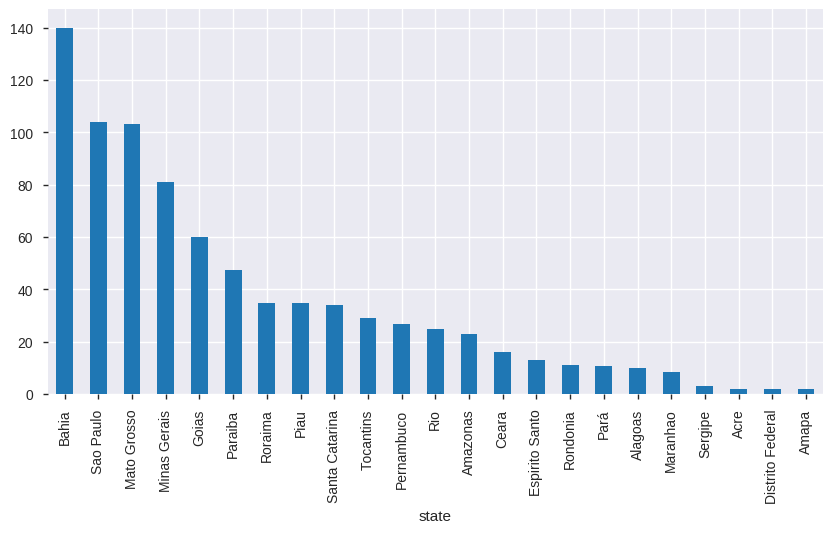

In [111]:
# Gráfico da mediana dos casos de incêndios por estado de forma ordenada
dataset.groupby('state')['number'].median().sort_values(ascending=False).plot.bar(figsize=(10,5))

In [109]:
# Média dos casos de incêndios por estado
dataset.groupby('state')['number'].mean()

state
Acre                 77.255356
Alagoas              19.271967
Amapa                91.345506
Amazonas            128.243218
Bahia               187.222703
Ceara               127.314071
Distrito Federal     14.899582
Espirito Santo       27.389121
Goias               157.721841
Maranhao            105.142808
Mato Grosso         203.479975
Minas Gerais        156.800243
Paraiba             111.073979
Pará                102.561272
Pernambuco          102.502092
Piau                158.174674
Rio                  64.698515
Rondonia             84.876272
Roraima             102.029598
Santa Catarina      101.924067
Sao Paulo           213.896226
Sergipe              13.543933
Tocantins           141.037176
Name: number, dtype: float64

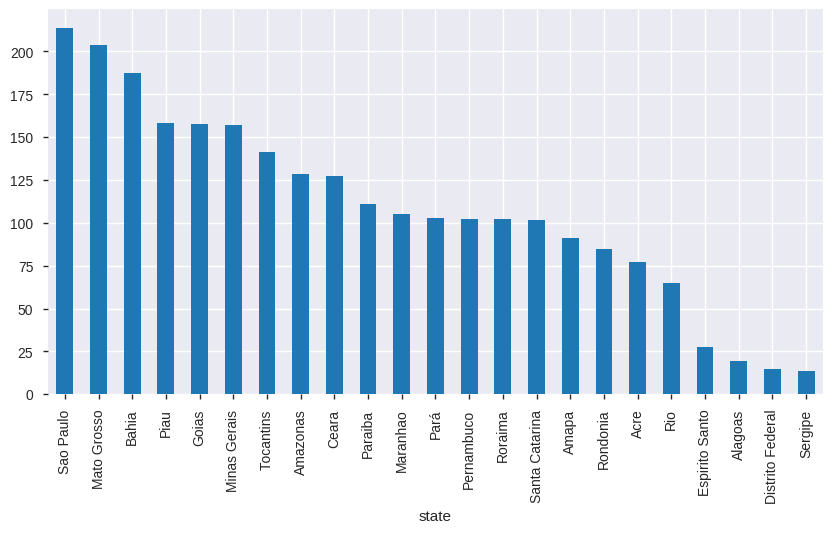

In [103]:
# Gráfico da média dos casos de incêndios por estado de forma ordenada
dataset.groupby('state')['number'].mean().nlargest(27).sort_values(ascending=False).plot.bar(figsize=(10,5))

Acima verificamos que São Paulo registrou no intervalo de 1998 a 2017 a maior média de casos de incêndios no Brasil. 

Apesar do resultado do cálculo da média ter apresentado que São Paulo tem a maior média de registros de casos de incêndios (suspeita forte de outliers), o gráfico apresentado abaixo mostra que Mato Grosso é que possui um número de casos de incêndios em comparação com São Paulo, devido a sua maior variabilidade dos dados.
Observamos também que onde os dados tem uma menor variabilidade, os casos de incêndios geralmente são menores, não levando em consideração os picos de casos isolados.   

Text(0, 0.5, 'Casos de incêncios')

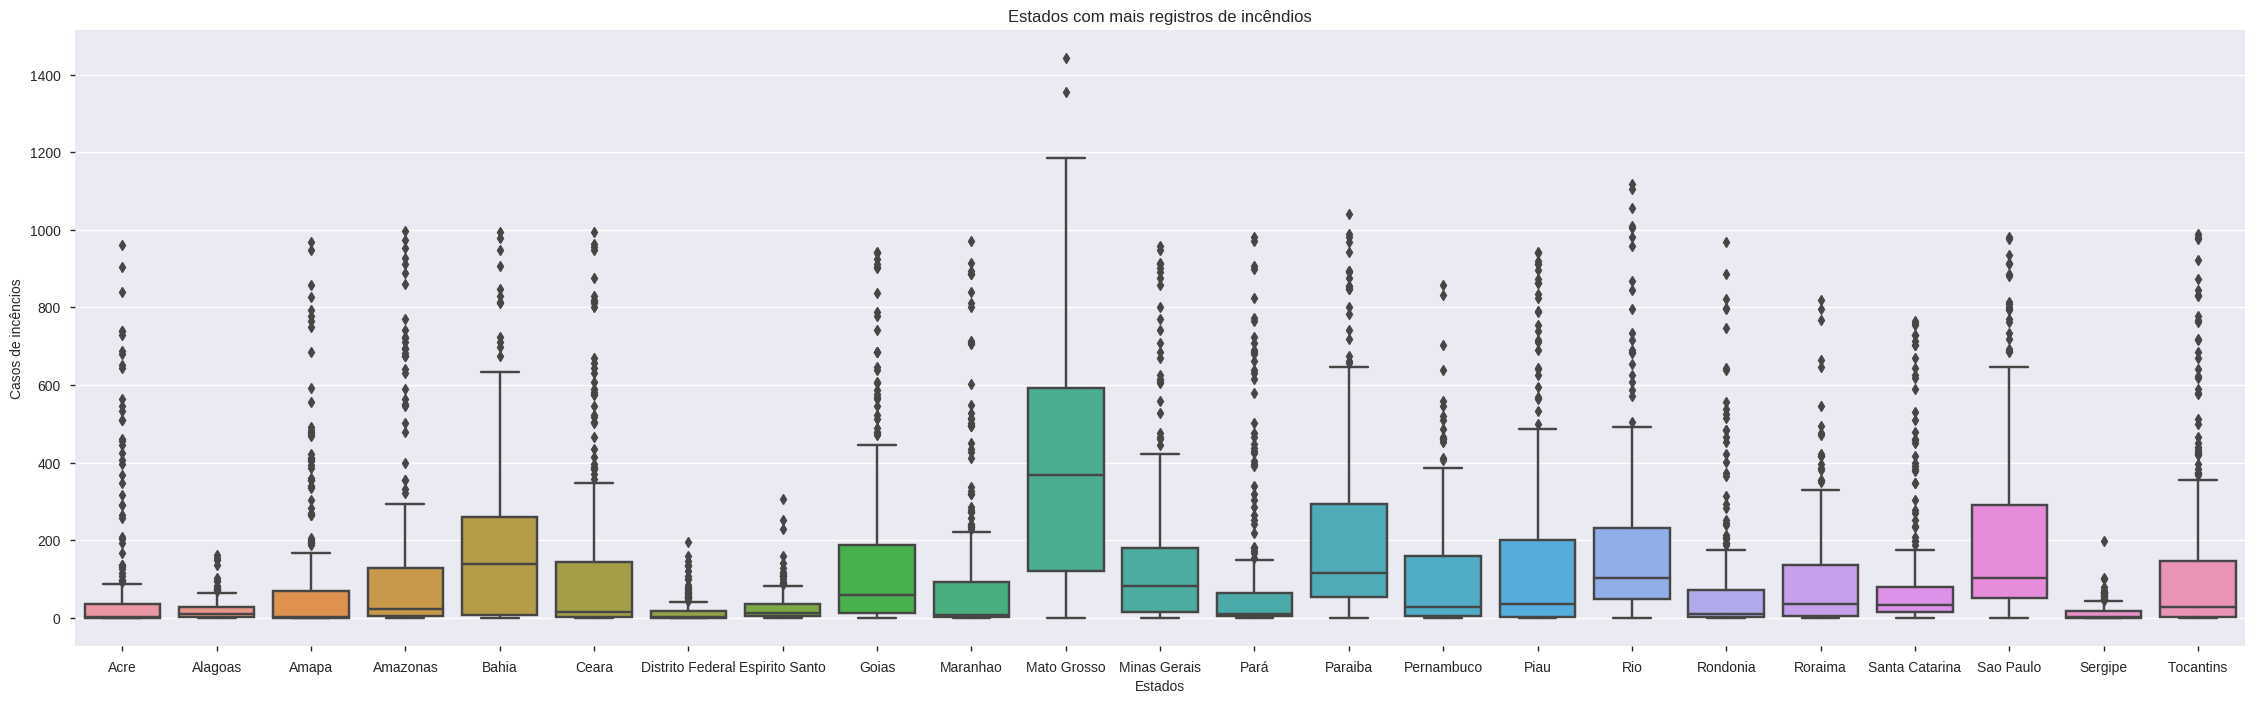

In [113]:
# Junção dos valores dos atributos das colunas year, state e month
juncao_valores = dataset.groupby(by = ['year','state', 'month']).sum().reset_index()
plt.figure(figsize=(28,8))
sns.boxplot(x = 'state', order = ['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], 
            y = 'number', data = juncao_valores)

plt.title('Estados com mais registros de incêndios', fontsize = 12)
plt.xlabel('Estados', fontsize = 10)
plt.ylabel('Casos de incêncios', fontsize =10)

Abaixo mostramos uma correlação com valor muito próximo de 1, ou seja, uma correlação positiva entre os atributos das colunas "year" (ano) e "number" (número de casos de incêndios): 

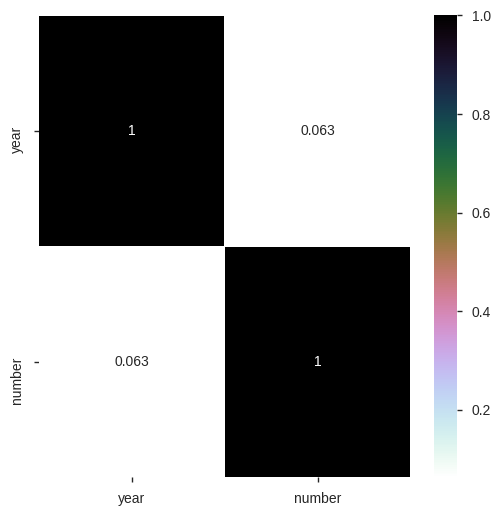

In [90]:
plt.figure(figsize = (6,6))
sns.heatmap(dataset.corr(),annot = True,linewidths = 0.5,cmap='cubehelix_r');

No gráfico abaixo, observamos também os casos de maiores registros de incêndios por estado, destacando em vermelho aqueles estados que fazem parte direta (denominados de "Amazonia Legal") da maior floresta do mundo, que é a Floresta Amazônica

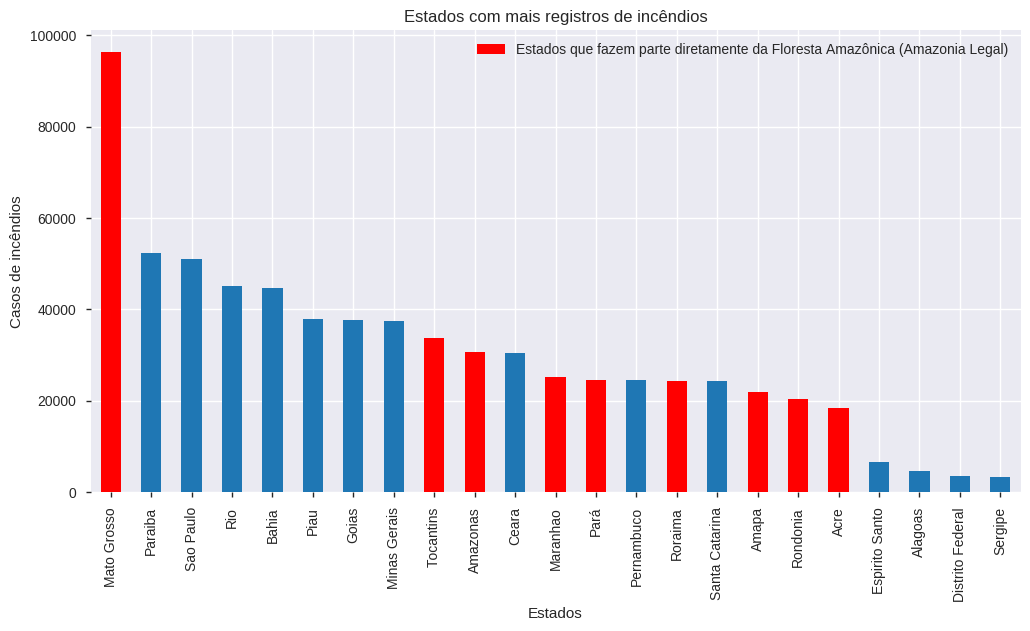

In [72]:
estados_incendios = ['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins']

estados = dataset.groupby('state')['number'].sum().sort_values(ascending=False)

ax = plt.gca()
colors = ['C0' if i not in amazonia_legal else 'r' for i in estados.index]
estados.plot(kind='bar',ax=ax,color=colors, figsize=(12, 6))
h,l = ax.get_legend_handles_labels()
ax.set_title("Estados com mais registros de incêndios")
ax.set_ylabel('Casos de incêndios')
ax.set_xlabel('Estados')
ax.legend(["Estados que fazem parte diretamente da Floresta Amazônica (Amazonia Legal)", "Outros estados"], labelspacing=2)

O gráfico a seguir mostra quais são os piores meses de casos de incêndios registrados, de acordo com os números de incêndios maiores que a média, e o desvio padrão do total de incêndios:

Meses com mais registros de incêndios: 
Agosto
Julho
Novembro
Outubro


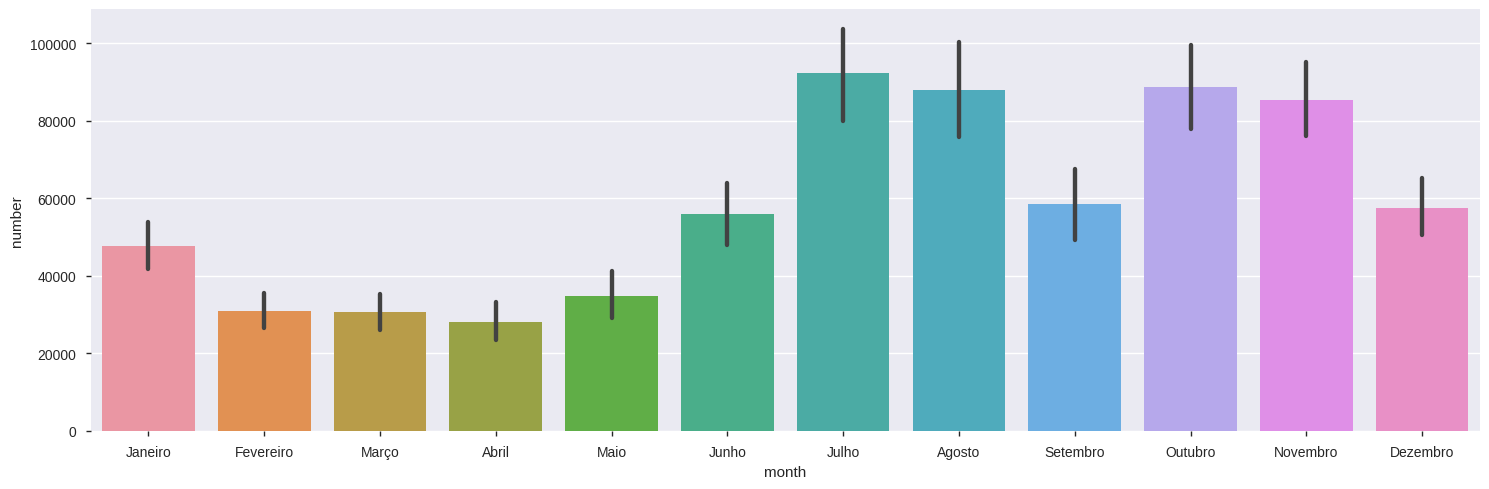

In [114]:
maior_numero_incendios_mes = dataset.groupby(['month'], as_index=False).sum() 
maior_numero_incendios_mes.drop('year',axis=1, inplace=True)

meses_mais_incendios = maior_numero_incendios_mes[maior_numero_incendios_mes['number']>maior_numero_incendios_mes['number'].mean()+maior_numero_incendios_mes['number'].std()]
print('Meses com mais registros de incêndios: ')
for i in range(len(meses_mais_incendios)):
    print(meses_mais_incendios['month'].values[i])

sns.catplot(x='month', y='number', kind='bar',data=dataset[['month','number']], aspect=3, estimator=sum);

No gráfico a seguir, comparamos o total de casos de incêndios no país com os estados que fazem parte da Floresta Amazônica.
Envidenciamos que nos meses de janeiro, fevereiro, março, abril, maio e junho, ou seja, na primeira metade do ano, a soma dos casos de incêndios na floresta amazônica é superior que a soma do restante do país. 

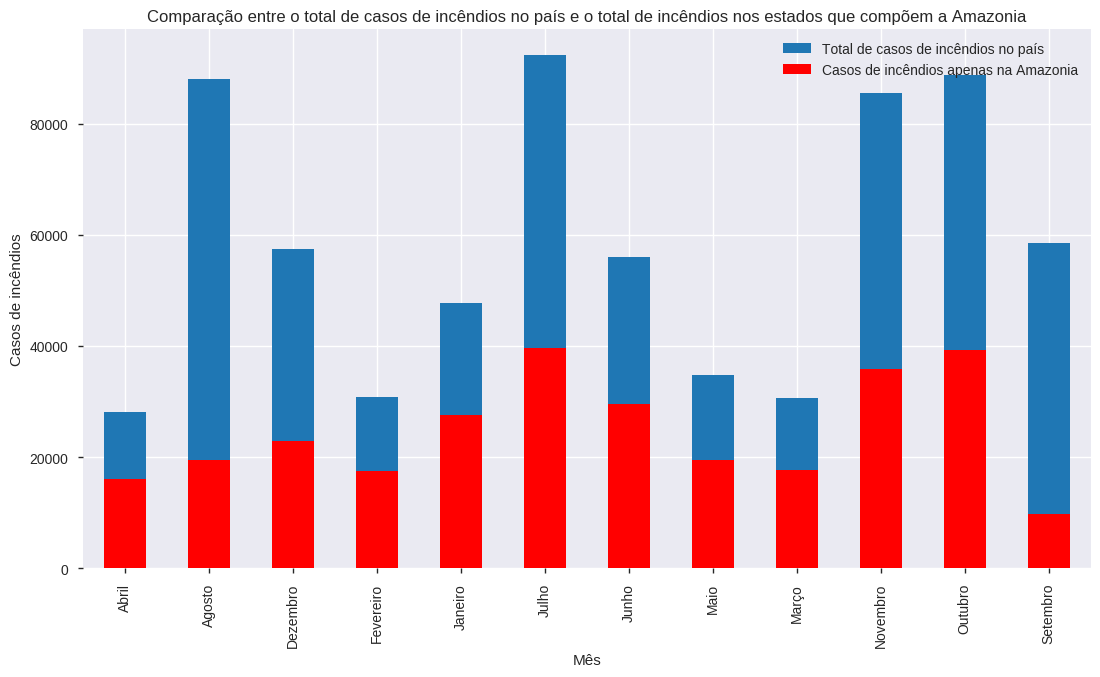

In [115]:
casos_de_incendios_mes = dataset.groupby('month')['number'].sum()
casos_de_incendios_amazonia = dataset[dataset.state.isin(amazonia_legal)].groupby('month')['number'].sum()

ax = plt.gca()
casos_de_incendios_mes.plot(kind='bar',x='month',y='number', ax=ax, stacked=True, figsize=(13, 7))
casos_de_incendios_amazonia.plot(kind='bar',x='month',y='number', ax=ax, stacked=True, color='r', figsize=(13, 7))
ax.set_title("Comparação entre o total de casos de incêndios no país e o total de incêndios nos estados que compõem a Amazonia")
ax.set_ylabel('Casos de incêndios')
ax.set_xlabel('Mês')
ax.legend(["Total de casos de incêndios no país", "Casos de incêndios apenas na Amazonia"])

In [62]:
#Instalando pacote Pandas Profiling para analisar o DataFrame
!pip install pandas-profiling 
import pandas_profiling 

In [63]:
pandas_profiling.ProfileReport(dataset)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,5
Number of observations,6422
Total Missing (%),0.0%
Total size in memory,251.0 KiB
Average record size in memory,40.0 B
Numeric,3
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0
